<a href="https://colab.research.google.com/github/arishma108/QuantumComputing/blob/master/IBM%20Quantum%20Challenge%202024/Copy_of_Lab4_Bonus_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
### Install Qiskit and relevant packages, if needed
### IMPORTANT: Make sure you are on 3.10 > python < 3.12
%pip install qiskit[visualization]==1.0.2
%pip install qiskit-ibm-runtime
%pip install qiskit-aer
%pip install graphviz
%pip install qiskit-serverless -U
%pip install qiskit-transpiler-service -U
%pip install git+https://github.com/qiskit-community/Quantum-Challenge-Grader.git -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 38.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 59.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 17.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 12.5 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=f9de2c2881db0dc45dad585f78dd53215f890ae83f348edf22e99f1181a83ac0
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.0/524.0 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 14.9 MB/s eta 0:00:00
  Cloning https://github.com/qiskit-community/Quantum-Challenge-Grader.git to /tmp/pip-req-build-dz15e15v
  Running command git clone --filter=blob:none --quiet https://github.com/qiskit-community/Quantum-Challenge-Grader.git /tmp/pip-req-build-dz15e15v
  Resolved https://github.com/qiskit-community/Quantum-Challenge-Grader.git to commit 312470070302f108cc55b67142b6fd083e844904
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 36.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 45.1 MB/s eta 0:00:00
  Using cached qiskit-1.0.2-cp38-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (5.6 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.7/134.7 kB 13.6 MB/s eta 0:00:

In [3]:
# Import all in one cell

import numpy as np
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit.library import RealAmplitudes
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.visualization import plot_gate_map, plot_circuit_layout, plot_distribution
from qiskit.circuit import ParameterVector

from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import (
    QiskitRuntimeService,
    EstimatorV2 as Estimator,
    SamplerV2 as Sampler,
    EstimatorOptions
)

import warnings
warnings.filterwarnings('ignore')

In [4]:
%set_env QXToken=6deea9f819e2a086bd0f4e828ad2626cc466b4b4df9efe354007ed58145ed9dc7274eebf4ab57e0812fddfc9285ddf98de61c04255b1e4dad61443090f95ea86


env: QXToken=6deea9f819e2a086bd0f4e828ad2626cc466b4b4df9efe354007ed58145ed9dc7274eebf4ab57e0812fddfc9285ddf98de61c04255b1e4dad61443090f95ea86


In [5]:

# qc-grader should be 0.18.13 (or higher)
import qc_grader

qc_grader.__version__

'0.18.14'

In [6]:
from qc_grader.challenges.iqc_2024 import grade_lab_bonus_ex1, grade_lab_bonus_ex2, grade_lab_bonus_ex3

In [7]:
def old_amplitude_embedding(num_qubits, bird_index):
    """Create amplitude embedding circuit

    Parameters:
        num_qubits (int): Number of qubits for the ansatz
        bird_index (int): Data index of the bird

    Returns:
        qc (QuantumCircuit): Quantum circuit with amplitude embedding of the bird
    """
    def generate_GHZ(qc):
        qc.h(0)
        for i, j in zip(range(num_qubits-1), range(1,num_qubits)):
            qc.cx(i, j)

    ### Write your code below here ###
    qc = QuantumCircuit(num_qubits)

    if bird_index < 5:  # IBM Quantum birds
        generate_GHZ(qc)

    # Apply bit flips based on the binary representation of the index
    binary_index = format(bird_index, '0' + str(num_qubits) + 'b')
    for i,  bit_str in enumerate(binary_index):
        if  bit_str == '1':
            qc.x(num_qubits-i-1)

    ### Don't change any code past this line ###
    return qc

In [8]:
QiskitRuntimeService.save_account(
    channel="ibm_quantum",
    token="6deea9f819e2a086bd0f4e828ad2626cc466b4b4df9efe354007ed58145ed9dc7274eebf4ab57e0812fddfc9285ddf98de61c04255b1e4dad61443090f95ea86",
    set_as_default=True,
    # Use `overwrite=True` if you're updating your token.
    overwrite=True,
)

Depth of two-qubit gates:  49


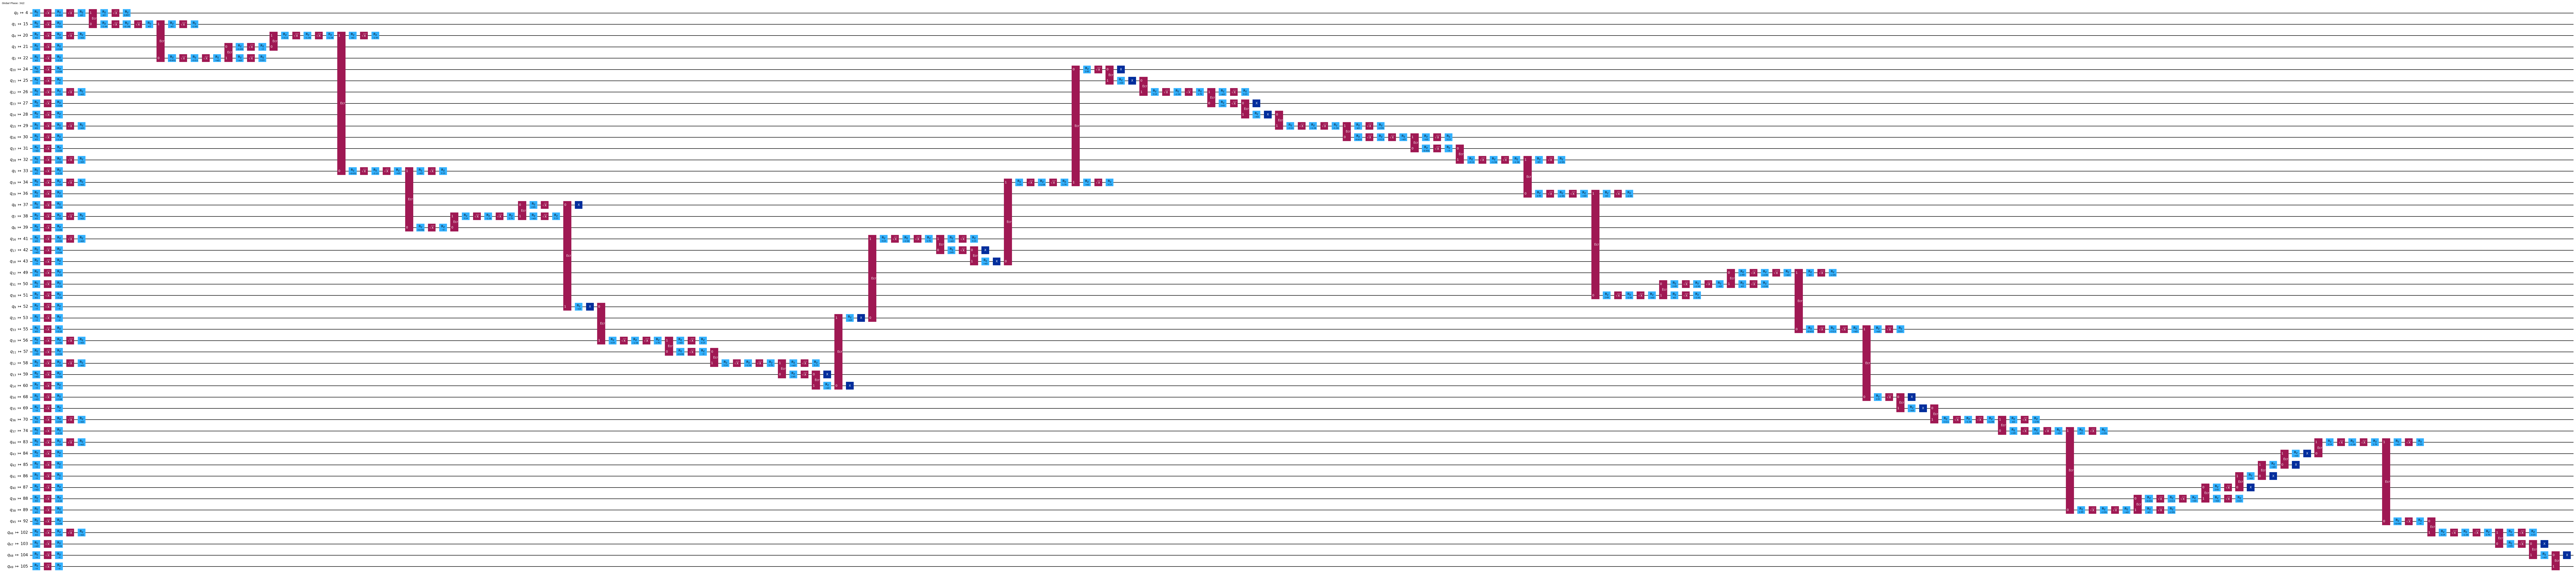

In [9]:
num_qubits = 50

# Choose a real backend
service = QiskitRuntimeService()
backend = service.backend("ibm_osaka")

# Define a fake backend with the same properties as the real backend
fake_backend = AerSimulator.from_backend(backend)

index_bird = 0 # You can check different birds by changing the index
qc = old_amplitude_embedding(num_qubits, index_bird)
pm = generate_preset_pass_manager(optimization_level=3, backend=fake_backend)
transpiled_qc = pm.run(qc)

print('Depth of two-qubit gates: ', transpiled_qc.depth(lambda x: len(x.qubits) == 2))
transpiled_qc.draw(output="mpl", fold=False, idle_wires=False)

In [10]:
def new_amplitude_embedding(num_qubits, bird_index):
    """Create efficient amplitude embedding circuit

    Parameters:
        num_qubits (int): Number of qubits for the ansatz
        bird_index (int): Data index of the bird

    Returns:
        qc (QuantumCircuit): Quantum circuit with amplitude embedding of the bird
    """

    def generate_efficient_GHZ(qc):
        # Create a bell pair
        qc.h(0)
        qc.cx(0, 1)

        index = 2  # Index of a target qubit
        qubits = [0, 1]  # Qubits which are already entangled

        while len(qubits) < num_qubits:
            temp_qubits = []

            # Entangle the remaining qubits with already entangled qubits
            for qubit in qubits:
                qc.cx(qubit, index)
                temp_qubits.append(index)
                index += 1
                if index >= num_qubits:
                    break

            qubits += temp_qubits  # Update the entangled qubits list

            ### Write your code below here ###

    qc = QuantumCircuit(num_qubits)

    if bird_index < 5:  # IBM Quantum birds
        generate_efficient_GHZ(qc)

    # Apply bit flips based on the binary representation of the index
    binary_index = format(bird_index, '0' + str(num_qubits) + 'b')
    for i,  bit_str in enumerate(binary_index):
        if  bit_str == '1':
            qc.x(num_qubits-i-1)

    ### Don't change any code past this line ###
    return qc

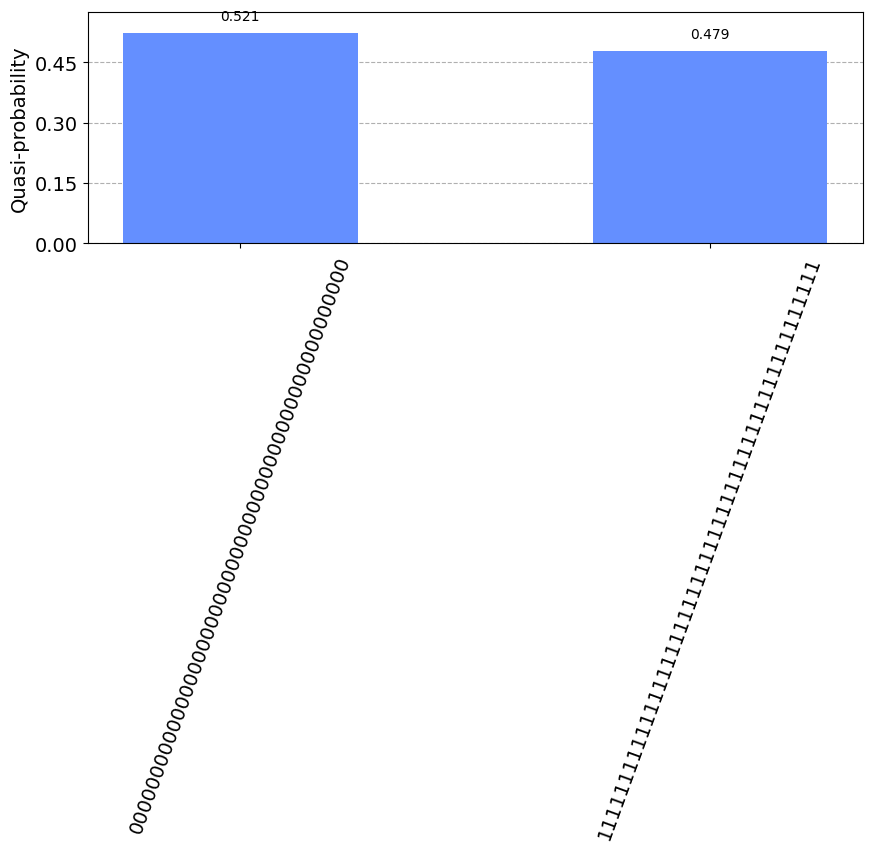

In [11]:
num_qubits = 50
index = 0 # Change to different values for testing
qc = new_amplitude_embedding(num_qubits, index)
qc.measure_all()

# Define the backend and the pass manager
aer_sim = AerSimulator(method='matrix_product_state')
pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=3)
isa_circuit = pm.run(qc)

# Define the sampler with the number of shots
sampler = Sampler(backend=aer_sim)
result = sampler.run([isa_circuit]).result()
samp_dist = result[0].data.meas.get_counts()
plot_distribution(samp_dist, figsize=(10, 3))

Depth of two-qubit gates:  32


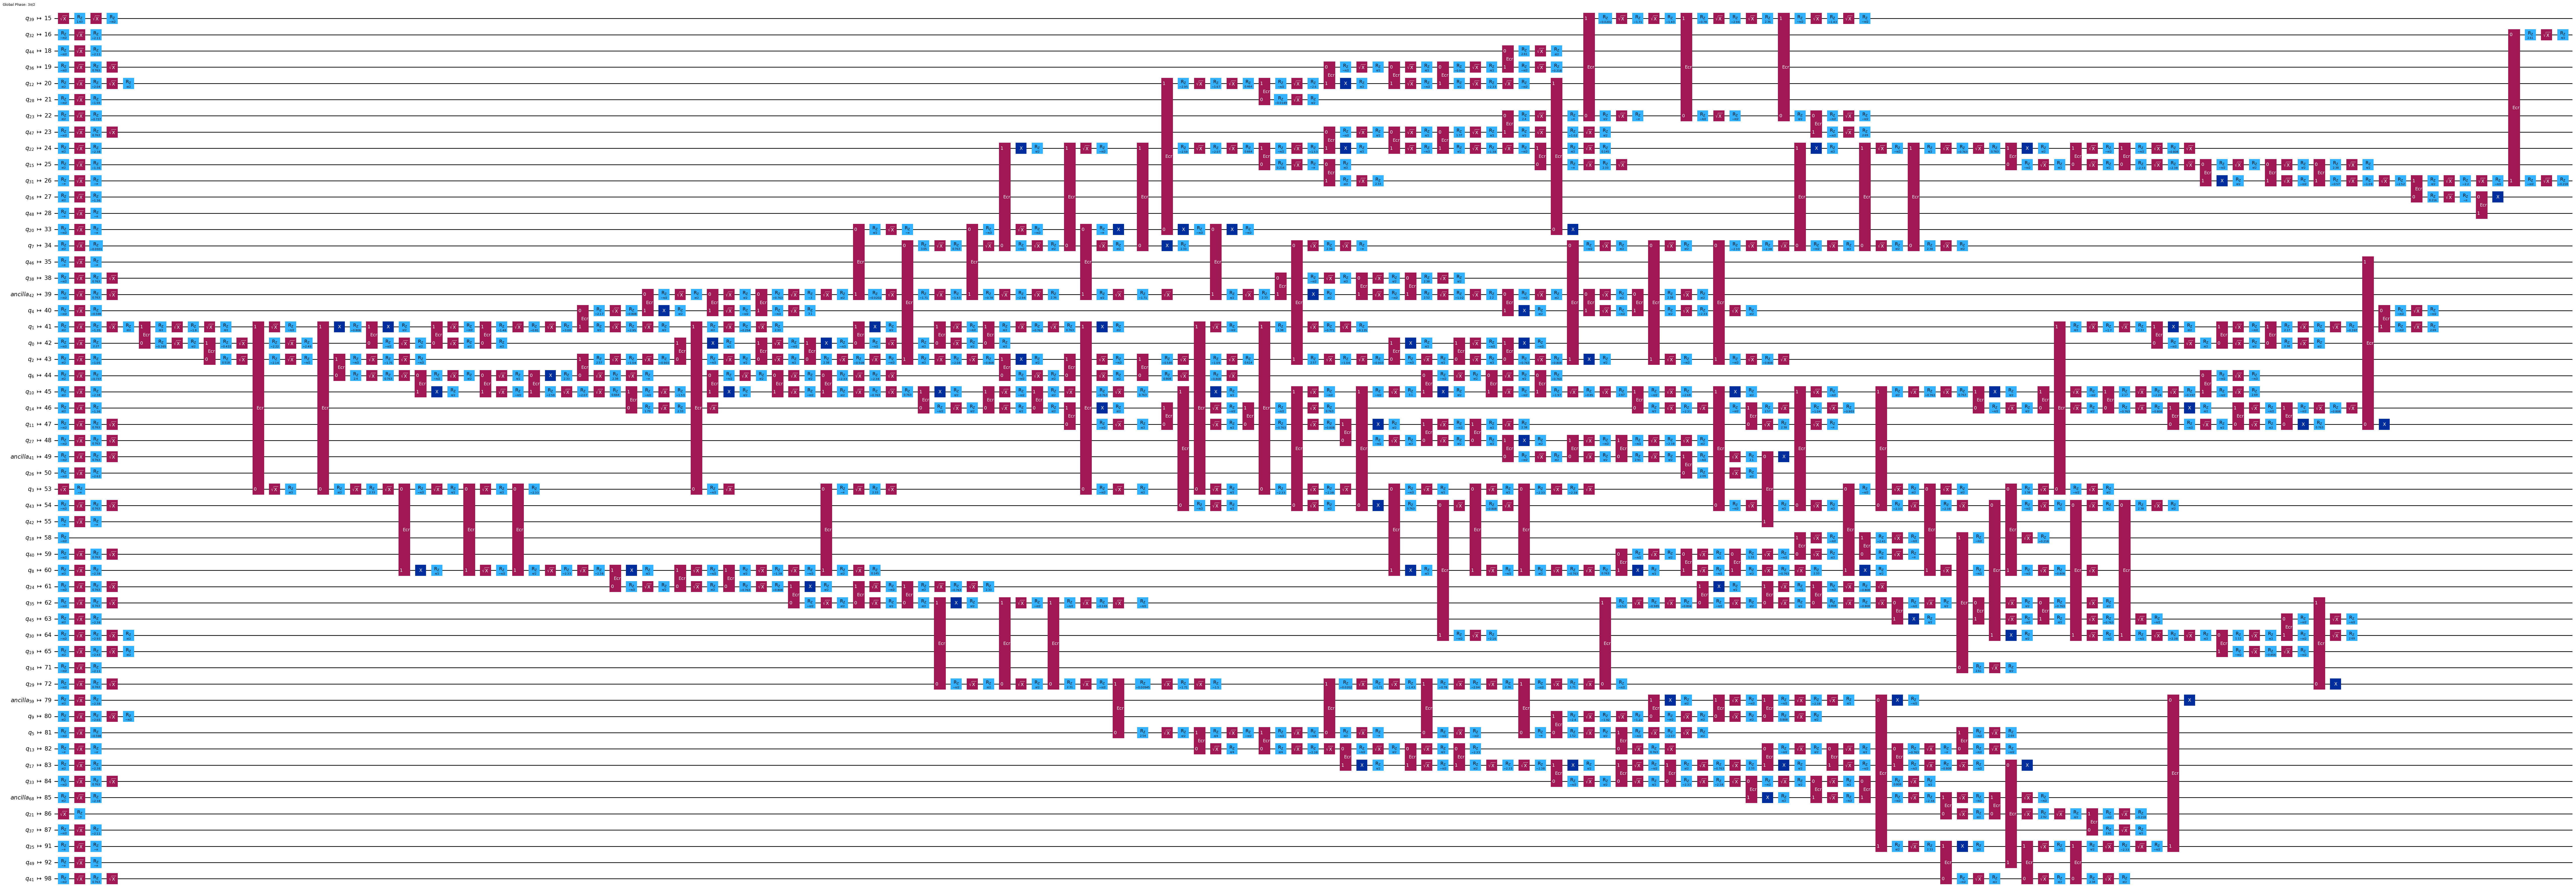

In [12]:
num_qubits = 50

# Choose a real backend
service = QiskitRuntimeService()
backend = service.backend("ibm_kyoto")

# Define a fake backend with the same properties as the real backend
fake_backend = AerSimulator.from_backend(backend)

index_bird = 0 #You can check different birds by changing the index
qc = new_amplitude_embedding(num_qubits, index_bird)
pm = generate_preset_pass_manager(optimization_level=3, backend=fake_backend)
transpiled_qc = pm.run(qc)

print('Depth of two-qubit gates: ', transpiled_qc.depth(lambda x: len(x.qubits) == 2))
transpiled_qc.draw(output="mpl", fold=False, idle_wires=False)

In [13]:
grade_lab_bonus_ex1(new_amplitude_embedding(50,3)) # Expected answer type: QuantumCircuit

Submitting your answer. Please wait...
New amplitude embedding circuit two-qubit depth: 6 < 13 (threshold).
Congratulations! 🎉 Your answer is correct.


In [ ]:
def generate_old_ansatz(qubits):
    qc = RealAmplitudes(qubits, reps=1, entanglement='pairwise')
    return qc

num_qubits = 50

# Choose a real backend
service = QiskitRuntimeService()
backend = service.backend("ibm_kyoto")

# Define a fake backend with the same properties as the real backend
fake_backend = AerSimulator.from_backend(backend)

index_bird = 0 # You can check different birds by changing the index
qc = new_amplitude_embedding(num_qubits, index_bird)
ansatz = generate_old_ansatz(num_qubits)
pm = generate_preset_pass_manager(optimization_level=3, backend=backend)
transpiled_qc = pm.run(qc.compose(ansatz))
print('Depth new mapping + old ansatz: ', transpiled_qc.depth(lambda x: len(x.qubits) == 2))
# transpiled_qc.draw(output="mpl", fold=False, idle_wires=False)

In [16]:
def generate_ansatz(num_qubits):
    """Generate a `RealAmplitudes` ansatz where all qubits are entangled with each other

    Parameters:
        num_qubits (int): Number of qubits for the ansatz

    Returns:
        qc (QuantumCircuit): Quantum circuit with the generated ansatz
    """
    ### Write your code below here ###

    # Create a custom entanglement map based on the heavy hex lattice connectivity

    entanglement_map = [[i, i+1] for i in range(0, num_qubits-1, 3)]

    # Generate the RealAmplitudes ansatz with the custom entanglement map
    qc = RealAmplitudes(num_qubits, entanglement=entanglement_map, reps=1)

    ### Don't change any code past this line ###
    return qc

In [17]:
index_bird = 0 # You can check different birds by changing the index
new_mapping_qc = new_amplitude_embedding(num_qubits, index_bird)
ansatz = generate_ansatz(num_qubits)
pm = generate_preset_pass_manager(optimization_level=3, backend=backend)
transpiled_qc = pm.run(new_mapping_qc.compose(ansatz))
print('Depth new mapping + new ansatz: ', transpiled_qc.depth(lambda x: len(x.qubits) == 2))
transpiled_qc.draw(output="mpl", fold=False, idle_wires=False)

Depth new mapping + new ansatz:  66


In [18]:
# Submit your answer using following code
grade_lab_bonus_ex2(new_mapping_qc) # Expected answer type: QuantumCircuit

Submitting your answer. Please wait...
Transpiled circuit two-qubit depth: 6 < 15 (threshold).
Congratulations! 🎉 Your answer is correct.


In [19]:
# Generate this to match your ansatz
source_list = []
for gate in ansatz.data:
    if gate[0].name == 'cx':
        source_qubit = gate[1][0].index
        if source_qubit not in source_list:
            source_list.append(source_qubit)

def generalize_optimal_params(num_qubits, ansatz, source_list):
    """Generate a `list of optimal parameters for N qubits

    Parameters:
        num_qubits (int): Number of qubits for the ansatz
        ansatz (QuantumCircuit): Ansatz for our VQC
        source_list (list): List of qubits used as source to entangle other qubits

    Returns:
        opt_params (list): List of optimal parameters generated for N qubits
    """

    opt_params = np.zeros(ansatz.num_parameters)
    for i in range(ansatz.num_parameters//2):
        if i in source_list:
            opt_params[i] = np.pi

    return opt_params

In [20]:
def test_shallow_VQC_QPU(num_qubits, list_labels, obs, opt_params, options, backend):
    """Tests the shallow VQC on a QPU

    Parameters:
        num_qubits (int): Number of qubits for the ansatz
        list_labels (list): List of labels
        obs: (SparsePauliOp): Observable
        opt_params (ndarray): Array of optimized parameters
        options (EstimatorOptions): Options for Estimator primitive
        backend (Backend): Real backend from IBM Quantum to run the job

    Returns:
        job_id (str): Job ID for Quantum job
    """
 ### Write your code below here ###
    estimator = Estimator(backend=backend, options=options)
    pm = generate_preset_pass_manager(optimization_level=3, backend=backend)

    pubs = []
    for bird, label in enumerate(list_labels):
        ### Write your code below here ###
        new_mapping = new_amplitude_embedding(num_qubits, bird)
        ansatz = generate_ansatz(num_qubits)
        classifier = new_mapping.compose(ansatz)
        transpiled_classifier = pm.run(classifier)
        transpiled_obs = obs.apply_layout(layout=transpiled_classifier.layout)
        pub = (transpiled_classifier, transpiled_obs, opt_params)
        # job = estimator.run([pub])
        # result = abs(job.result()[0].data.evs)
        # results_test.append(result)
        ### Don't change any code past this line ###
        pub = (transpiled_classifier, transpiled_obs, opt_params)
        pubs.append(pub)

    job = estimator.run(pubs)
    job_id = job.job_id()
    print(f"Job ID: {job_id}")
    print(f"Status: {job.status()}")

    ### Don't change any code past this line ###
    return job_id

def retrieve_job(job_id):
    """Retrieve test results from job id
    Parameters:
        job_id (str): Job ID
    Returns:
        results_test (list): List of test results
        errors_test (list): List of test errors
    """

    job = service.job(job_id)
    results_test = []
    errors_test = []
    for result in job.result():
        results_test.append(abs(abs(result.data.evs)-1)) #Cost Function has a -1
        errors_test.append(abs(result.data.stds))

    return results_test, errors_test

def test_shallow_VQC_CPU(num_qubits, list_labels, obs, opt_params, options, backend):
    """Tests the shallow VQC on a QPU

    Parameters:
        num_qubits (int): Number of qubits for the ansatz
        list_labels (list): List of labels
        obs: (SparsePauliOp): Observable
        opt_params (ndarray): Array of optimized parameters
        options (EstimatorOptions): Options for Estimator primitive
        backend (Backend): AerSimulator backend to run the job

    Returns:
        results_test (list): List of test results
    """
    estimator = Estimator(backend=backend, options=options)
    pm = generate_preset_pass_manager(optimization_level=3, backend=backend)

    results_test = []

    ### Write your code below here ###
    for bird_index,label in enumerate(list_labels):
        new_mapping = new_amplitude_embedding(num_qubits, bird_index)
        ansatz = generate_ansatz(num_qubits)
        classifier = new_mapping.compose(ansatz)
        transpiled_classifier = pm.run(classifier)
        transpiled_obs = obs.apply_layout(layout=transpiled_classifier.layout)
        pub = (transpiled_classifier, transpiled_obs, opt_params)
        job = estimator.run([pub])

     ### Don't change any code past this line ###
        result = job.result()[0].data.evs
        results_test.append(abs(abs(result)-1)) # Cost Function has a -1

    return results_test

def compute_performance(result_list, list_labels):
    """Return the performance of the classifier

    Parameters:
        result_list (list): List of results
        list_labels (list): List of labels

    Returns:
        performance (float): Performance of the classifier
    """
    ### Write your code below here ###
    total_cost = sum(abs(result - label) for result, label in zip(result_list, list_labels))
    performance = 100 - 100 * (total_cost / (2**num_qubits))

    ### Don't change any code past this line ###
    return performance




Performance for resilience 0: 100.0


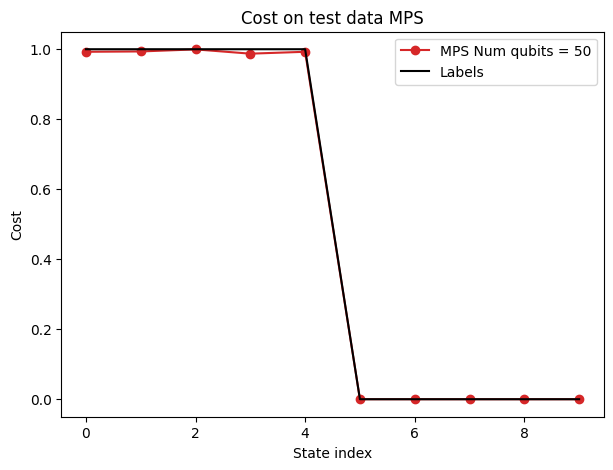

In [21]:
num_qubits = 50

aer_sim = AerSimulator(method='matrix_product_state')
pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=3)
isa_circuit = pm.run(new_mapping_qc)

list_labels = np.append(np.ones(5), np.zeros(5))
obs = SparsePauliOp("Z"*num_qubits)
opt_params = generalize_optimal_params(num_qubits, generate_ansatz(num_qubits), source_list)
options = EstimatorOptions()

results_test_aer_sim = test_shallow_VQC_CPU(num_qubits, list_labels, obs, opt_params, options, aer_sim)

fig, ax = plt.subplots(1, 1, figsize=(7,5))
ax.set_title('Cost on test data MPS')
ax.set_ylabel('Cost')
ax.set_xlabel('State index')
print(f"Performance for resilience 0: {compute_performance(results_test_aer_sim, list_labels)}")
ax.plot(results_test_aer_sim, 'o-', color='tab:red', label='MPS Num qubits = ' + str(num_qubits))
ax.plot(list_labels, 'k-', label='Labels')
ax.legend()

In [22]:
# Submit your answer using following code
grade_lab_bonus_ex3(results_test_aer_sim) # Expected variable types: List

Submitting your answer. Please wait...
Performance: 99.66% > 90% (threshold).
Congratulations! 🎉 Your answer is correct.


In [23]:
service = QiskitRuntimeService()
backend = service.backend("ibm_sherbrooke")

In [24]:
# RUN JOBS
num_qubits = 50
obs = SparsePauliOp("Z"*num_qubits)
opt_params = generalize_optimal_params(num_qubits, generate_ansatz(num_qubits), source_list)

for resilience in [0,1]:

    DD = True
    options = EstimatorOptions(default_shots = 5_000,
                            optimization_level=0,
                            resilience_level=resilience)
    options.dynamical_decoupling.enable = DD
    options.dynamical_decoupling.sequence_type = 'XpXm'

    # OPTIONAL
    options.resilience.zne_mitigation = True
    options.resilience.zne.noise_factors = (1, 1.2, 1.5)
    options.resilience.zne.extrapolator = ('exponential', 'linear', 'polynomial_degree_2') #order matters

    job_id = test_shallow_VQC_QPU(num_qubits, list_labels, obs, opt_params, options, backend)

Job ID: csp7th2ea560008fhveg
Status: QUEUED
Job ID: csp7wrkp1vzg008ads9g
Status: QUEUED


Performance for no DD + no TREX: 100.000
Performance for DD + TREX: 100.000


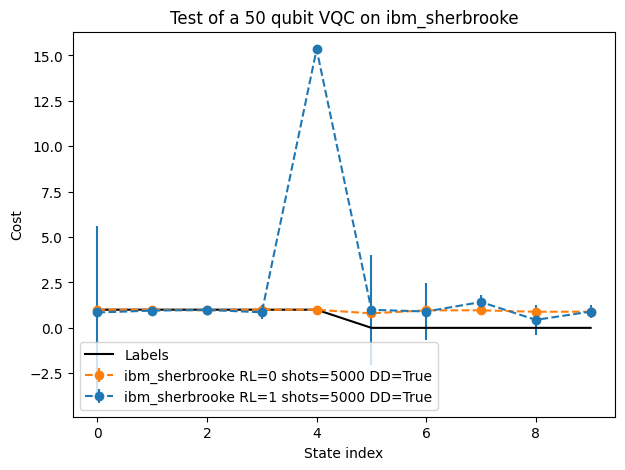

In [25]:
results_test_0_DD, errors_test_0_DD = retrieve_job('csp7th2ea560008fhveg')
results_test_1_DD, errors_test_1_DD = retrieve_job('csp7wrkp1vzg008ads9g')

fig, ax = plt.subplots(1, 1, figsize=(7,5))
ax.set_title(f'Test of a {num_qubits} qubit VQC on {backend.name}')
ax.set_ylabel('Cost')
ax.set_xlabel('State index')

print(f"Performance for no DD + no TREX: {compute_performance(results_test_0_DD, list_labels):.3f}")
print(f"Performance for DD + TREX: {compute_performance(results_test_1_DD, list_labels):.3f}")
ax.errorbar(range(10), results_test_0_DD, fmt='--o', yerr=errors_test_0_DD, color='tab:orange', label=f'{backend.name} RL=0 shots={options.default_shots} DD={options.dynamical_decoupling.enable}')
ax.errorbar(range(10), results_test_1_DD, fmt='--o',  yerr=errors_test_1_DD, color='tab:blue', label=f'{backend.name} RL=1 shots={options.default_shots} DD={options.dynamical_decoupling.enable}')

ax.plot(list_labels, 'k-', label='Labels')

ax.legend()



Performance for no DD + no TREX: 100.000
Performance for DD + TREX: 100.000


(-0.5, 1.5)

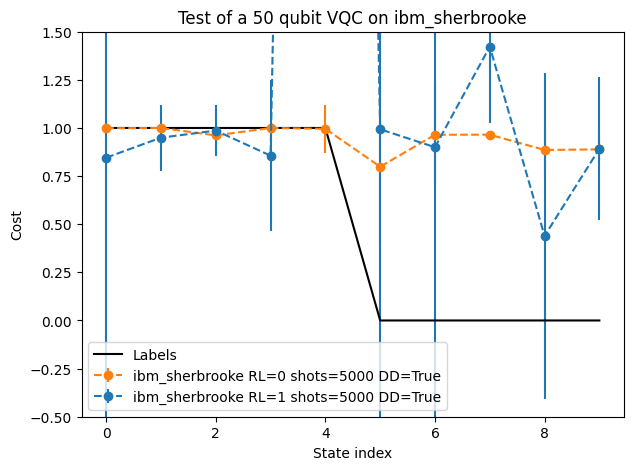

In [26]:
results_test_0_DD, errors_test_0_DD = retrieve_job('csp7th2ea560008fhveg')
results_test_1_DD, errors_test_1_DD = retrieve_job('csp7wrkp1vzg008ads9g')

fig, ax = plt.subplots(1, 1, figsize=(7,5))
ax.set_title(f'Test of a {num_qubits} qubit VQC on {backend.name}')
ax.set_ylabel('Cost')
ax.set_xlabel('State index')

print(f"Performance for no DD + no TREX: {compute_performance(results_test_0_DD, list_labels):.3f}")
print(f"Performance for DD + TREX: {compute_performance(results_test_1_DD, list_labels):.3f}")
ax.errorbar(range(10), results_test_0_DD, fmt='--o', yerr=errors_test_0_DD, color='tab:orange', label=f'{backend.name} RL=0 shots={options.default_shots} DD={options.dynamical_decoupling.enable}')
ax.errorbar(range(10), results_test_1_DD, fmt='--o',  yerr=errors_test_1_DD, color='tab:blue', label=f'{backend.name} RL=1 shots={options.default_shots} DD={options.dynamical_decoupling.enable}')

ax.plot(list_labels, 'k-', label='Labels')

ax.legend()


plt.ylim((-0.5, 2.0))  # Set y-limits to -0.5 and 2.0
# Or
plt.ylim((-0.5, 1.5))  # Set y-limits to -0.5 and 1.5
